In [1]:
%matplotlib inline
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [2]:
def my_plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
train_labels = []
train_samples = []

In [4]:
# Create our own data here of imaginary clinical trial
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) # denotes they did experiences side effects

    # The ~5% of older individuals who did NOT experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0) # denotes they did NOT experiences side effects

In [5]:
for i in range(1000):
    # The ~95% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0) # denotes they did NOT experiences side effects

    # The ~95% of older individuals who did NOT experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1) # denotes they did experiences side effects

In [6]:
## ADDTIONAL CODE to validation_set.py
test_labels = []
test_samples = []

In [7]:
# Create our own data here of imaginary clinical trial
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1) # denotes they did experiences side effects

    # The ~5% of older individuals who did NOT experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0) # denotes they did NOT experiences side effects

In [8]:
for i in range(200):
    # The ~95% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0) # denotes they did NOT experiences side effects

    # The ~95% of older individuals who did NOT experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1) # denotes they did experiences side effects

In [9]:
# Now process above data

# Make them as numpy array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
# Shuffle them to make them random
train_labels, train_samples = shuffle(train_labels, train_samples)

In [10]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
# Shuffle them to make them random
test_labels, test_samples = shuffle(test_labels, test_samples)

In [11]:
# normalize the age data to make them in range of 0 to 1 (as against 13 - 100)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [12]:
# just print scaled data
# for i in scaled_train_samples:
#    print(i)

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,  activation='softmax') # units = 2 since we need two outputs (did or did not experience )
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile it
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train it and split 10% of data as validation set
# even though shuffle is true, validation set is seperated before shuffle, so it may not contain random data as we want
# we will see val_loss & val_accuracy output as against when we did not specify the validation split param
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=39, shuffle=True, verbose=2)

Epoch 1/39
189/189 - 0s - loss: 0.2527 - accuracy: 0.9423 - val_loss: 0.2316 - val_accuracy: 0.9524
Epoch 2/39
189/189 - 0s - loss: 0.2522 - accuracy: 0.9444 - val_loss: 0.2314 - val_accuracy: 0.9524
Epoch 3/39
189/189 - 0s - loss: 0.2515 - accuracy: 0.9397 - val_loss: 0.2308 - val_accuracy: 0.9524
Epoch 4/39
189/189 - 0s - loss: 0.2513 - accuracy: 0.9423 - val_loss: 0.2303 - val_accuracy: 0.9524
Epoch 5/39
189/189 - 0s - loss: 0.2507 - accuracy: 0.9423 - val_loss: 0.2301 - val_accuracy: 0.9524
Epoch 6/39
189/189 - 0s - loss: 0.2503 - accuracy: 0.9434 - val_loss: 0.2299 - val_accuracy: 0.9524
Epoch 7/39
189/189 - 0s - loss: 0.2498 - accuracy: 0.9423 - val_loss: 0.2294 - val_accuracy: 0.9524
Epoch 8/39
189/189 - 0s - loss: 0.2494 - accuracy: 0.9423 - val_loss: 0.2292 - val_accuracy: 0.9524
Epoch 9/39
189/189 - 0s - loss: 0.2489 - accuracy: 0.9429 - val_loss: 0.2288 - val_accuracy: 0.9524
Epoch 10/39
189/189 - 0s - loss: 0.2484 - accuracy: 0.9423 - val_loss: 0.2285 - val_accuracy: 0.9524

In [18]:
# NOW PREDICT using test samples
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions = np.argmax(predictions, axis=-1)

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [20]:
cm_plot_labels = ['No Side Effects', 'Side Effects']

Confusion Matrix without normalization
[[196  14]
 [ 10 200]]


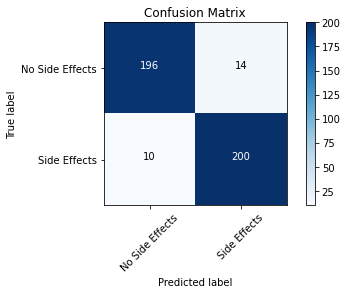

In [21]:
my_plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [23]:
# check is file already exist and save if not
import os.path
filename = 'models/medical_trial_model.h5'
if os.path.isfile(filename) is False:
    model.save(filename)

 This saves:
 
    * The arch of the model which allows to re-create the model
    * The weights of the model
    * The training configuration (loss, optimizer)
    * The state of the optimizer, allowing to resume training exactly where you left off

In [24]:
from tensorflow.keras.models import load_model
new_model = load_model(filename)

In [25]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.get_weights()

[array([[ 0.33447263, -0.06141913, -0.189046  ,  0.36264455, -0.07475865,
          0.42118412,  0.7775639 , -0.21770126,  0.01060589,  0.48594734,
          0.686629  ,  0.2231412 , -0.1334934 ,  0.4965591 ,  0.2947379 ,
         -0.5303366 ]], dtype=float32),
 array([-0.14916816,  0.        ,  0.        , -0.15088257,  0.        ,
        -0.16129212, -0.13617486,  0.        ,  0.21072024, -0.00867426,
        -0.14200732,  0.17759165,  0.        , -0.15944642, -0.0968411 ,
         0.        ], dtype=float32),
 array([[-5.00262022e-01,  8.23052451e-02, -3.88523340e-01,
          5.08974075e-01,  1.10815696e-01, -2.46899620e-01,
          3.20480227e-01,  3.91989537e-02, -4.02723551e-01,
          2.38108724e-01, -9.14708748e-02, -1.19445354e-01,
         -7.57489204e-02, -5.07682323e-01, -3.11396182e-01,
          1.93178922e-01, -4.88035828e-01,  7.53148645e-03,
         -2.58084029e-01, -8.08753818e-02,  1.00681059e-01,
          3.53221655e-01, -1.97163045e-01, -3.68052013e-02,
 

In [27]:
new_model.optimizer